# Features Engineering

<h2>Table of Contents</h2>

- [Features Engineering](#features-engineering)
  - [1. Fast Fourier Transform Visualization](#1.-fast-fourier-transform-visualization)
    - [1.1. Focused State](#1.1.-focused-state)
    - [1.2. Unfocused State](#1.2.-unfocused-state)
    - [1.3. Drownsy state](#1.3.-drownsy-state)
    - [1.4. Spectrogram Plot](#1.4.-spectrogram-plot)
  - [2. Features Extraction](#2.-features-extraction)
    - [2.1. Sliding Window Illustrate](#2.1.-sliding-window-illustrate)
    - [2.2. Sliding Window Method](#2.2.-sliding-window-method)
    - [2.3. Epoch method (if necessary)](#2.3.-epoch-method-(if-necessary))



## 1. Fast Fourier Transform Visualization

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sys
sys.path.append('preprocessing')

In [2]:
df = pd.read_csv("data/extracted_eeg15.csv")
df.head()

,t,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4,state
0,0,37.563596,-50.685744,140.055423,-69.255063,-31.215001,10.160328,-5.975149,-23.552903,-17.513367,15.208299,-14.087958,12.143459,20.436554,-23.282476,focused
1,1,152.663481,-204.111750,563.898195,-278.904145,-124.242003,39.723369,-23.992332,-95.957996,-72.053707,61.882634,-56.257292,49.433238,83.056209,-95.137900,focused
2,2,239.532724,-315.308944,869.060476,-430.123263,-188.069529,58.047285,-36.601060,-150.592819,-115.314553,96.774939,-85.069801,77.402375,129.989861,-149.727691,focused
3,3,199.003026,-257.118091,702.420004,-348.468870,-148.852971,43.773885,-29.299423,-123.409328,-98.665749,79.186397,-66.249983,63.487913,106.559125,-122.365933,focused
4,4,149.422150,-196.610234,531.421196,-264.639439,-113.933299,35.927404,-24.501993,-88.973977,-74.520295,58.723707,-49.945070,47.104776,77.507148,-86.982072,focused


In [3]:
df.describe()

,t,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4
count,359164.000000,359164.000000,359164.000000,359164.000000,359164.000000,359164.000000,359164.000000,359164.000000,359164.000000,359164.000000,359164.000000,359164.000000,359164.000000,3.591640e+05,359164.000000
mean,179581.500000,0.000170,-0.000102,-0.000015,0.000072,-0.000040,0.000286,-0.000164,0.000004,0.000103,-0.000247,-0.000242,-0.000132,-5.897179e-07,0.000306
std,103681.860379,6.114760,6.362930,9.991744,7.129331,6.458338,9.139658,14.892720,11.609269,7.815827,6.096936,7.232793,5.801847,5.855271e+00,7.367146
min,0.000000,-166.796566,-315.308944,-281.787757,-430.123263,-188.069529,-64.313871,-222.167372,-150.592819,-128.132934,-64.134590,-362.767406,-63.528719,-8.862905e+01,-149.727691
25%,89790.750000,-3.532687,-3.718494,-5.389564,-4.144899,-3.894354,-5.278460,-6.601765,-6.301759,-4.783957,-3.643921,-3.739842,-3.389838,-3.386327e+00,-4.509564
50%,179581.500000,-0.054516,0.024311,-0.009268,-0.011853,0.033821,0.085779,0.144897,0.089068,0.016966,-0.063046,-0.082286,-0.052975,-5.778202e-02,-0.052211
75%,269372.250000,3.480568,3.740428,5.362570,4.121827,3.887698,5.364475,6.792390,6.441503,4.794177,3.583918,3.679714,3.334758,3.338925e+00,4.465924
max,359163.000000,239.532724,117.574064,869.060476,167.731365,84.247247,73.983790,343.496246,116.184616,87.760061,96.774939,178.074465,77.402375,1.299899e+02,86.582630


In [4]:
# setting
fs = 128

In [5]:
from preprocessing.visualize import viz_fft, viz_nepochs_state

### 1.1. Focused State

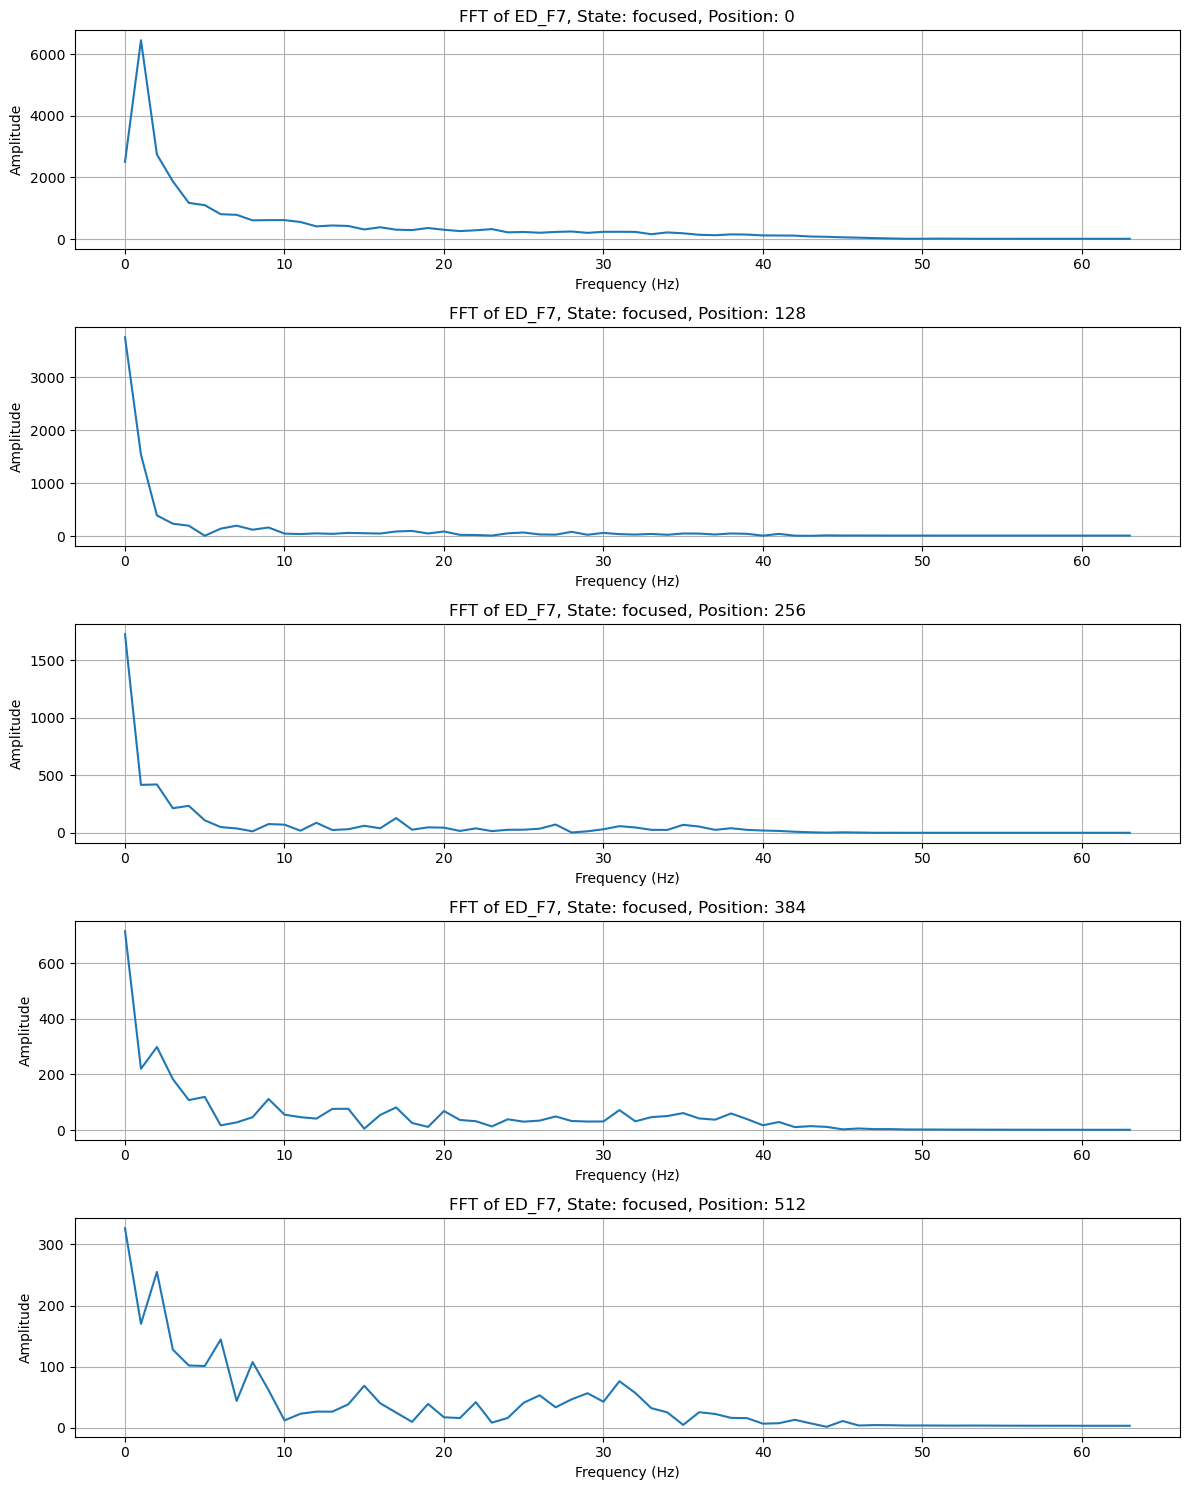

In [6]:
# Test with channel ED_F7 with 3 epochs, focused state
channel = 'ED_F7'
num_epochs = 5

viz_nepochs_state(df, channel, num_epochs, state='focused')

### 1.2. Unfocused State

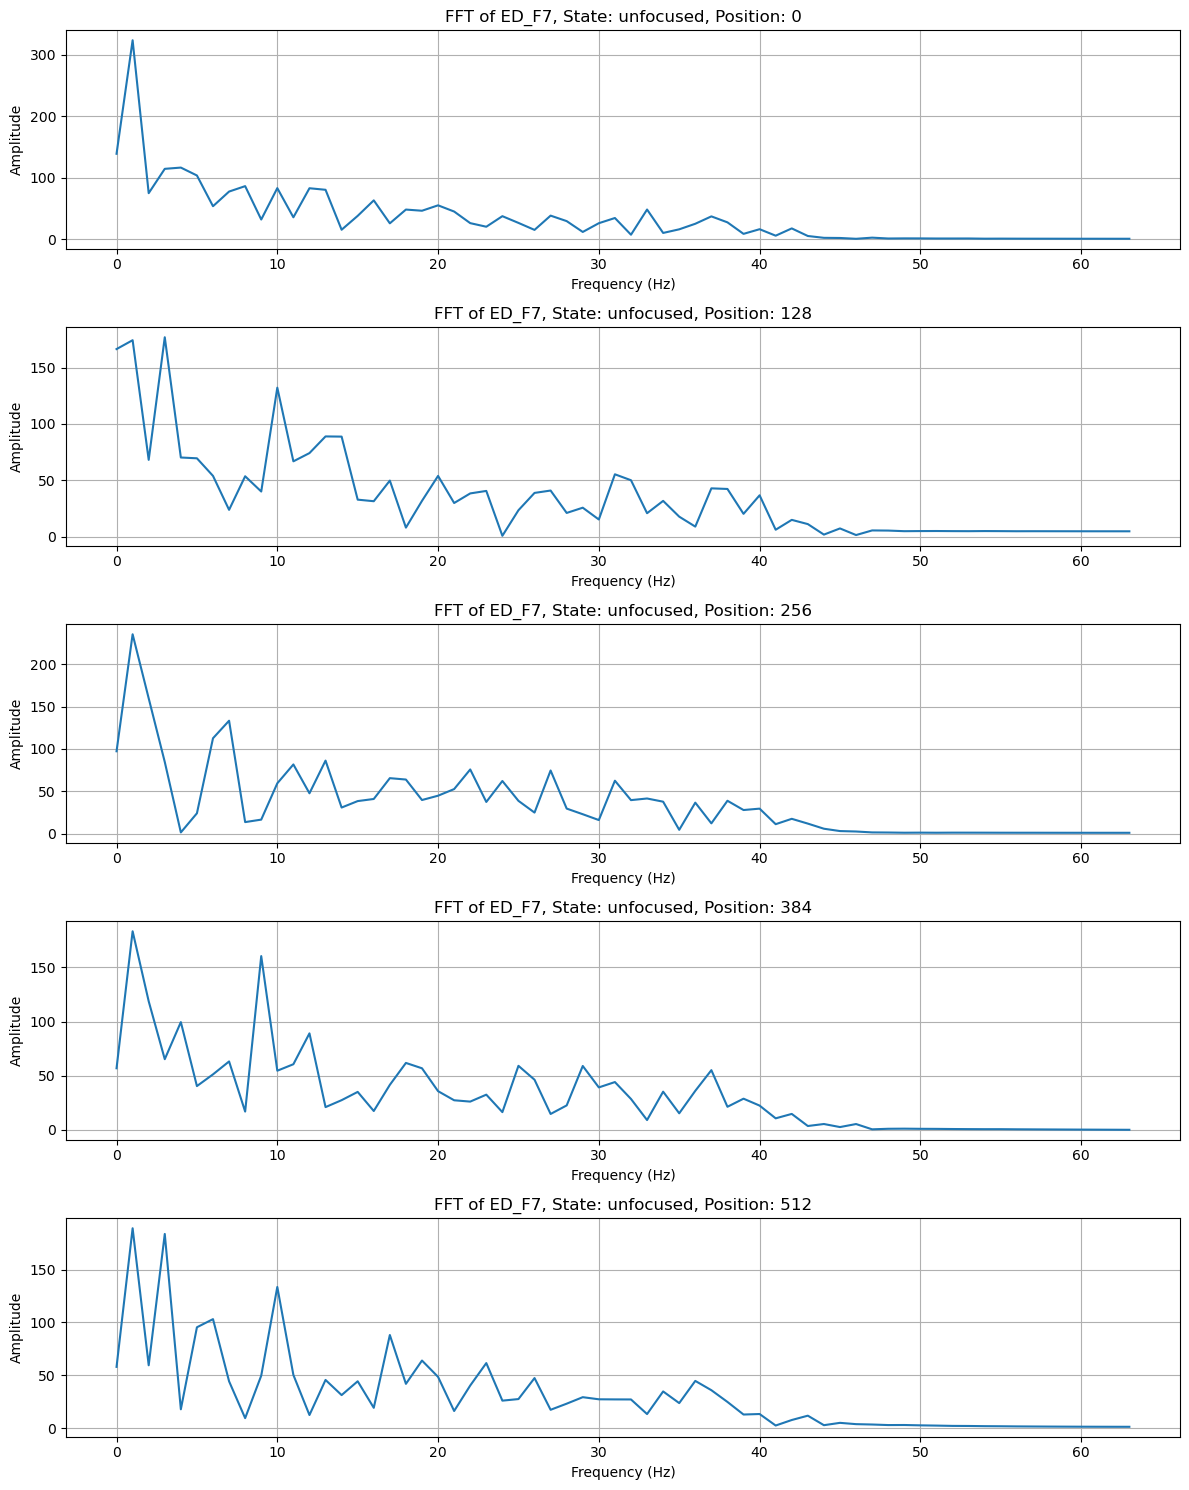

In [7]:
# Test with channel ED_F7 with 3 epochs, unfocused state
viz_nepochs_state(df, channel, num_epochs, state='unfocused')

### 1.3. Drownsy state

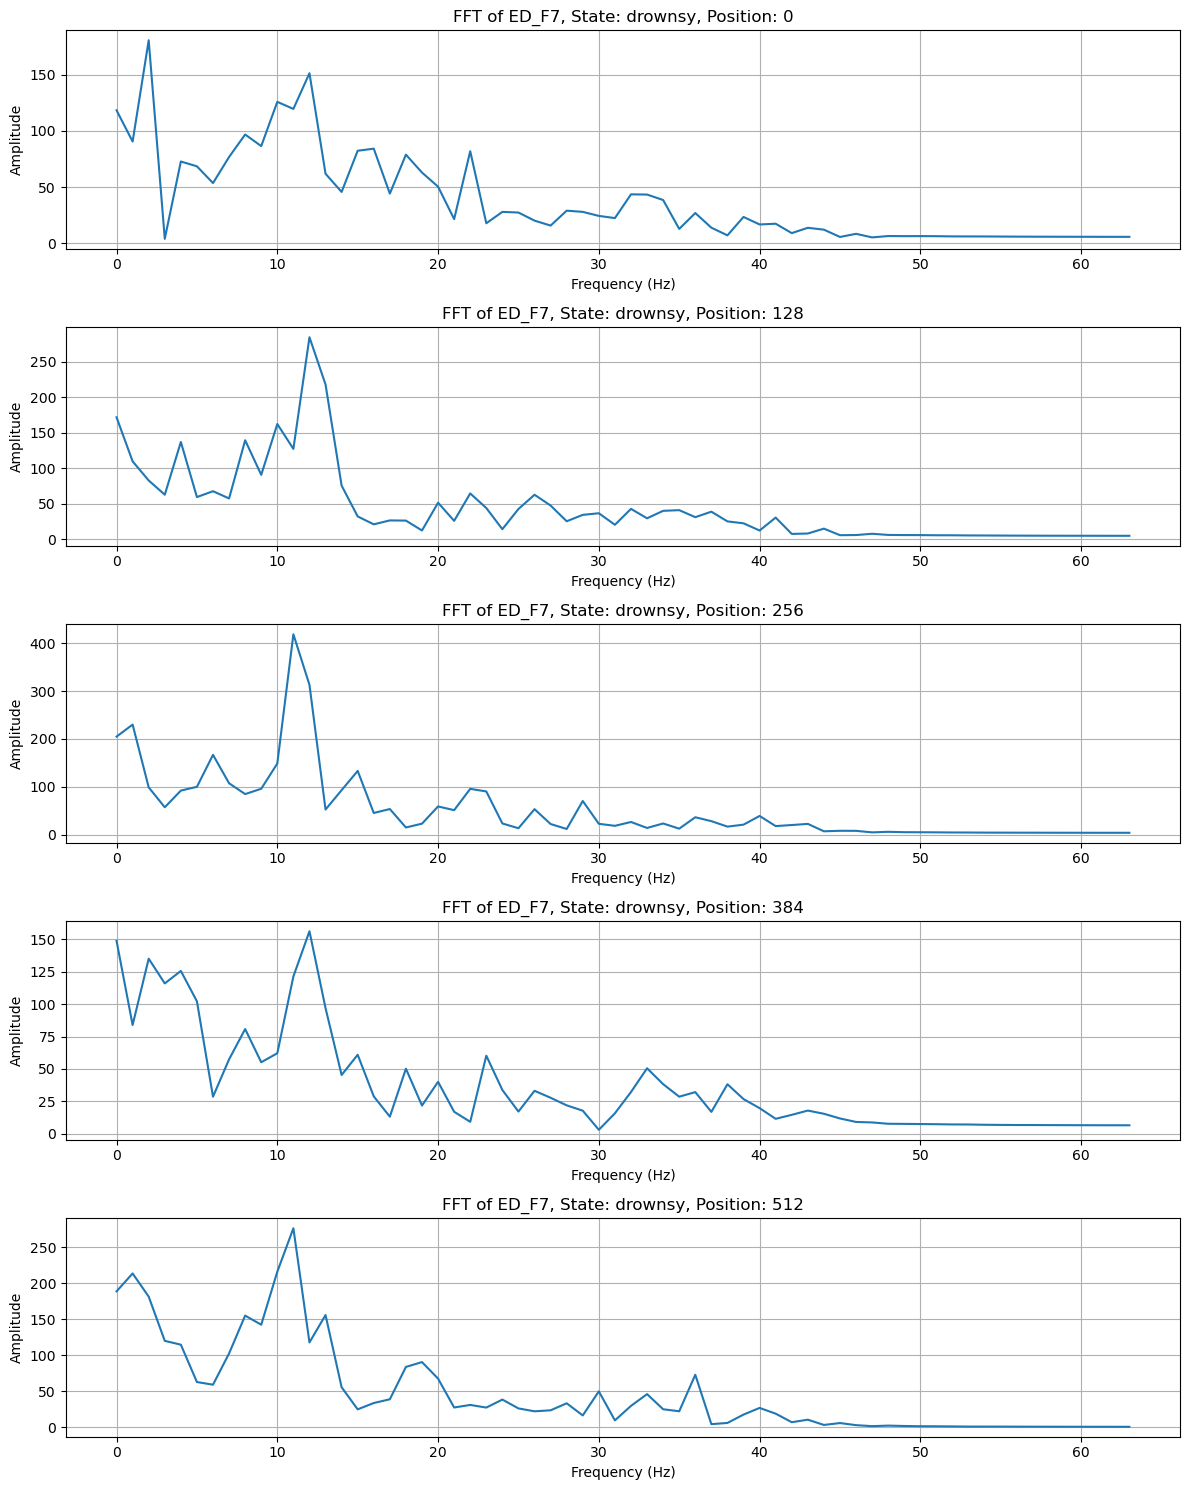

In [ ]:
# Test with channel ED_F7 with 3 epochs, drowsy state

viz_nepochs_state(df, channel, num_epochs, state='drowsy')

### 1.4. Spectrogram Plot

In [9]:
# useful channel
useful_channels = ['ED_F7','ED_F3','ED_P7','ED_O1','ED_O2','ED_P8','ED_AF4']
# then useful_columns is 
useful_columns = ['t', 'ED_F7','ED_F3','ED_P7','ED_O1','ED_O2','ED_P8','ED_AF4', 'state']

df = df[useful_columns]

In [10]:
from preprocessing.visualize import plot_spectrogram

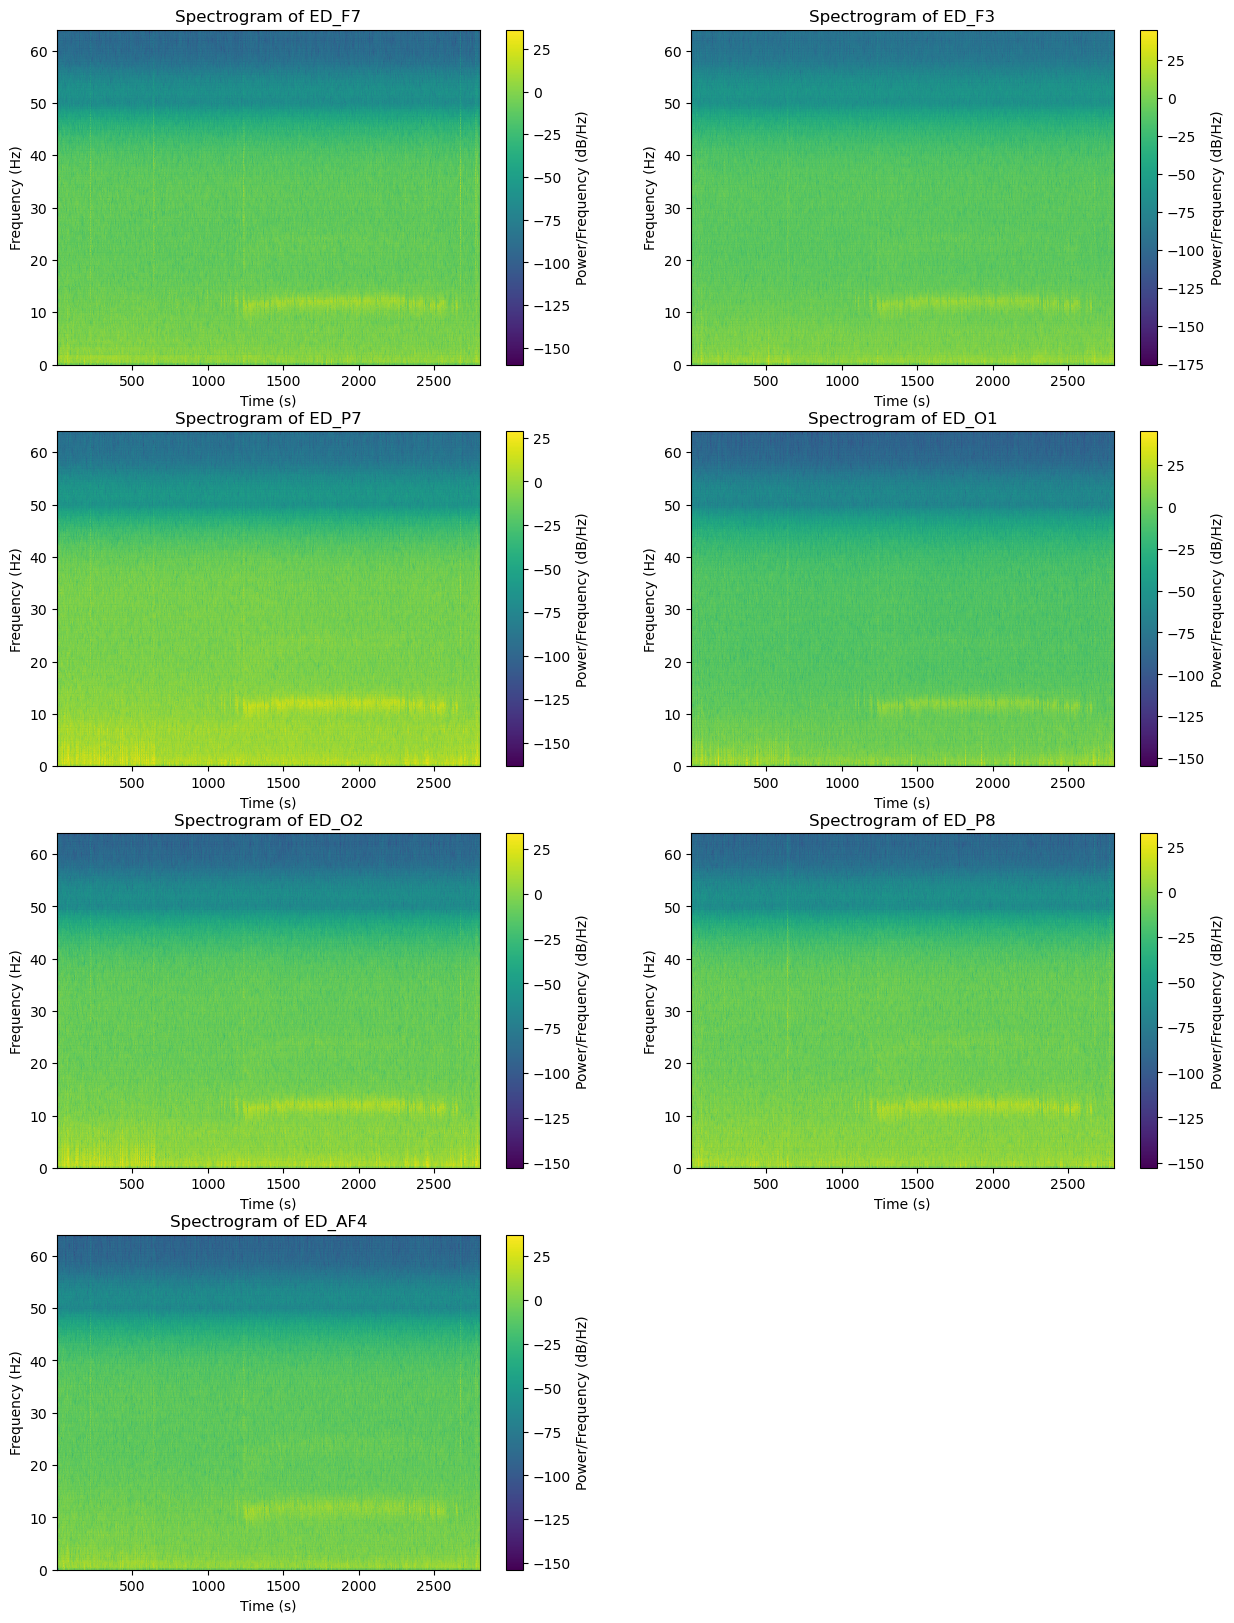

In [11]:
plt.figure(figsize=(15, 20))
ncols = 2
nrows = int(np.ceil(len(useful_channels) / ncols))

for idx, channel in enumerate(useful_channels):
    plt.subplot(nrows, ncols, idx+1)
    plot_spectrogram(df, channel)

plt.show()

## 2. Features Extraction

1. **Power spectral density (PSD):**
   - Power in specific frequency bands (delta, theta, alpha, beta, gamma). This feature is calculated using FFT to compute the power spectrum at different frequencies within each signal window.
   
2. **Relative Power:**
   - The ratio of power in each frequency band to the total power. This is important information to compare the energy distribution between frequency bands, which can help detect changes in brain activity.

3. **Peak Frequency:**
   - The frequency at the point with the highest amplitude in the FFT spectrum. This is an important indicator to identify prominent frequencies in the EEG signal, helping to distinguish different brain activity states.

4. **Band Ratios:**
   - The ratio between frequency bands, such as the beta/alpha ratio, is a useful feature to analyze changes in brain activities related to alertness or relaxation.

5. **Descriptive Statistics:**
   - Includes basic statistical parameters such as:
     - **Mean:** This feature helps understand the average level of the EEG signal within a time window.
     - **Standard Deviation:** Measures the variability of the EEG signal, helping to distinguish between stable and unstable states.
     - **Median:** Provides information about the distribution of the EEG signal, less affected by outliers.
     - **Min/Max:** Identifies the extreme values in the EEG signal.
   
6. **Spectral Entropy:**
   - Measures the uncertainty in the power spectrum of the EEG signal. High entropy indicates instability in brain activity, while low entropy indicates a more stable state.

7. **Skewness:**
   - Measures the asymmetry of the EEG signal distribution compared to a normal distribution. High skewness may indicate imbalance in the data, potentially related to changes in brain states.

8. **Kurtosis:**
   - Measures the sharpness of the EEG signal distribution. High kurtosis may indicate the signal has many sharp peaks, which can reflect strong changes in brain activity.

9. **Wavelet Features:**
   - Uses wavelet transform (here, 'db4' wavelet) to analyze the EEG signal at different levels of detail. These features include:
     - **Energy of detail coefficients:** Measures the energy of the detail coefficients in the wavelet transform, indicating the level of high-frequency variations in the signal.
     - **Relative energy:** The ratio of the energy of the detail coefficients to the total energy in the signal, helping to understand the energy distribution across different frequencies.

### 2.1. Sliding Window Illustrate

In [ ]:
def rolling_average(data, window_length, step_size):
    averages = []
    positions = []
    for start in range(0, len(data) - window_length + 1, step_size):
        end = start + window_length
        window_data = data[start:end]
        avg = np.mean(window_data)
        averages.append(avg)
        positions.append((start, end))
    return averages, positions

# Example Data
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

window_length = 4
step_size = 2

averages, positions = rolling_average(data, window_length, step_size)

for i, (avg, pos) in enumerate(zip(averages, positions)):
    print(f"Window {i+1}: Pos {pos}, Values: {data[pos[0]:pos[1]]}, Avg: {avg}")

Window 1: Pos (0, 4), Values: [1 2 3 4], Avg: 2.5
Window 2: Pos (2, 6), Values: [3 4 5 6], Avg: 4.5
Window 3: Pos (4, 8), Values: [5 6 7 8], Avg: 6.5
Window 4: Pos (6, 10), Values: [ 7  8  9 10], Avg: 8.5


### 2.2. Features Extraction 

In [ ]:
from preprocessing.feature_engineer import feature_extraction

# Parameters
fs = 128
window_length = 256 # Window length in samples
step_rate = 0.25

feature_df = feature_extraction(df, window_length, step_rate)

In [18]:
print(feature_df.shape)
print(feature_df.columns)

feature_df.to_csv("data/feat_extracted_eeg15.csv", index=False)

(5600, 204)
Index(['ED_F7_spectral_entropy', 'ED_F7_peak_frequency', 'ED_F7_mean',
       'ED_F7_std', 'ED_F7_median', 'ED_F7_min', 'ED_F7_max', 'ED_F7_skewness',
       'ED_F7_kurtosis', 'ED_F7_power_delta',
       ...
       'ED_AF4_wavelet_d2_energy', 'ED_AF4_wavelet_d3_energy',
       'ED_AF4_wavelet_d4_energy', 'ED_AF4_wavelet_d5_energy',
       'ED_AF4_wavelet_d1_relative_energy',
       'ED_AF4_wavelet_d2_relative_energy',
       'ED_AF4_wavelet_d3_relative_energy',
       'ED_AF4_wavelet_d4_relative_energy',
       'ED_AF4_wavelet_d5_relative_energy', 'state'],
      dtype='object', length=204)
